In [251]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

In [252]:
# Loading in the data
# 77_cancer_proteomes_CPTAC_itraq and therefore will be our main data set
pre_data = pd.read_csv("Data/77_cancer_proteomes_CPTAC_itraq.csv")
clinical = pd.read_csv("Data/clinical_data_breast_cancer.csv")
PAM50 = pd.read_csv("Data/PAM50_proteins.csv")

# Data Preparation and Exploration

In [253]:
# The data is made up of 12553 rows and 86 columns
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RefSeq_accession_number  12553 non-null  object 
 1   gene_symbol              10773 non-null  object 
 2   gene_name                12553 non-null  object 
 3   AO-A12D.01TCGA           11334 non-null  float64
 4   C8-A131.01TCGA           11335 non-null  float64
 5   AO-A12B.01TCGA           11334 non-null  float64
 6   BH-A18Q.02TCGA           12024 non-null  float64
 7   C8-A130.02TCGA           12025 non-null  float64
 8   C8-A138.03TCGA           11833 non-null  float64
 9   E2-A154.03TCGA           11833 non-null  float64
 10  C8-A12L.04TCGA           11732 non-null  float64
 11  A2-A0EX.04TCGA           11732 non-null  float64
 12  AO-A12D.05TCGA           11276 non-null  float64
 13  AN-A04A.05TCGA           11276 non-null  float64
 14  BH-A0AV.05TCGA        

In [254]:
pre_data.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [255]:
# As we can see the first column contains the the proteins, the second the gene_symbol, the third the gene name. All other columns the IDs of the different samples.
# These numerical values are indicating the protein expression in the given sample. Positive values are the ones that show a higher expression than normal, while negative ones show lower expression
# For the analysis the gene symbol and name won't be needed and therefore we delete these columns.
pre_data.pop("gene_symbol")
pre_data.pop("gene_name")
pre_data.head(n=3)

,RefSeq_accession_number,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747


In [256]:
# In my opinion it is a bit strange that the samples are in the columns so I transpose the dataset
proteins=pre_data.RefSeq_accession_number.tolist()
proteome_samples = pre_data.iloc[:,3:]
data = proteome_samples.transpose()
data.columns = proteins
samples = data.index
data.head()
# Now in the rows are the different samples and in the columns the different protein expression values

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997
C8-A138.03TCGA,2.765081,2.779709,2.779709,2.797995,2.787023,2.779709,2.783366,2.783366,2.205538,0.749997,...,-3.250913,1.711825,-0.248402,NaN,4.707022,4.107251,-3.203370,1.971481,NaN,NaN
E2-A154.03TCGA,0.862659,0.870186,0.870186,0.866423,0.870186,0.870186,0.870186,0.870186,1.920171,2.349197,...,-3.386203,-2.328692,-2.806642,NaN,-4.733495,-9.584499,-4.786183,-3.103949,NaN,NaN


<AxesSubplot: title={'center': 'C8-A12T.06TCGA'}, ylabel='Frequency'>

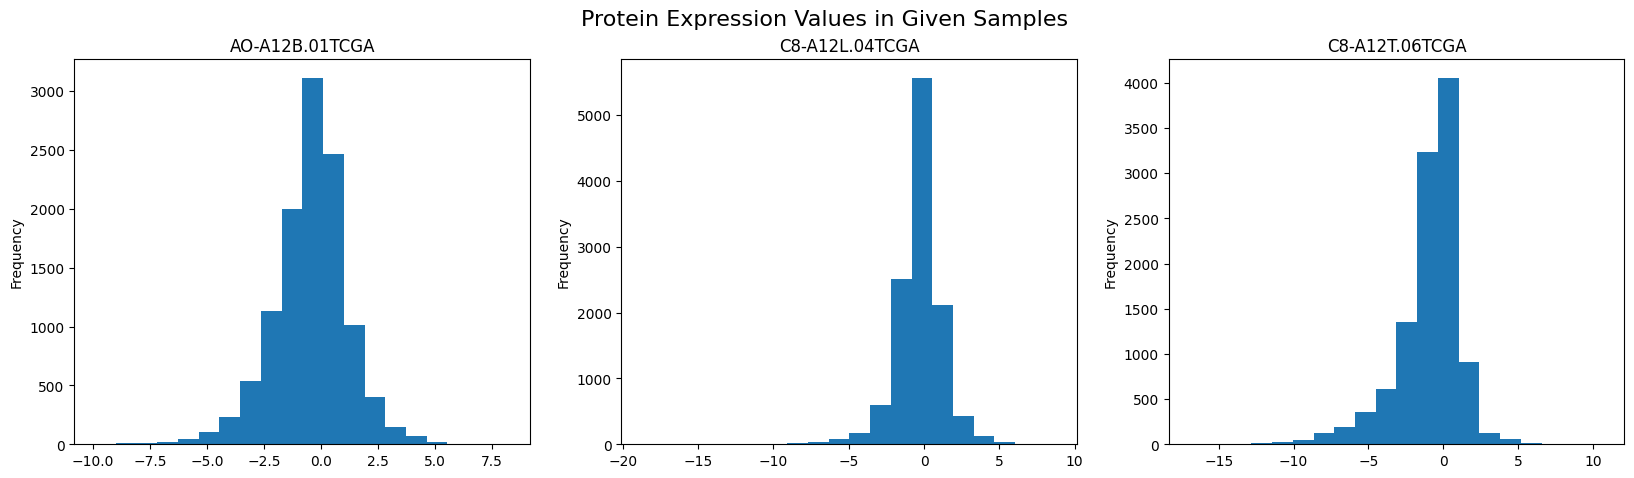

In [257]:
# We can also plot these values. Here we can see the protein expression values in one sample and their distribution
plt.figure(figsize=(20,5))
plt.suptitle("Protein Expression Values in Given Samples", fontsize=16)
plt.subplot(1,3,1)
data.loc[samples[0]].plot(kind="hist", bins = 20, title = samples[0])
plt.subplot(1,3,2)
data.loc[samples[5]].plot(kind="hist", bins = 20, title = samples[5])
plt.subplot(1,3,3)
data.loc[samples[10]].plot(kind="hist", bins = 20, title = samples[10])

<AxesSubplot: title={'center': 'NP_076965'}, ylabel='Frequency'>

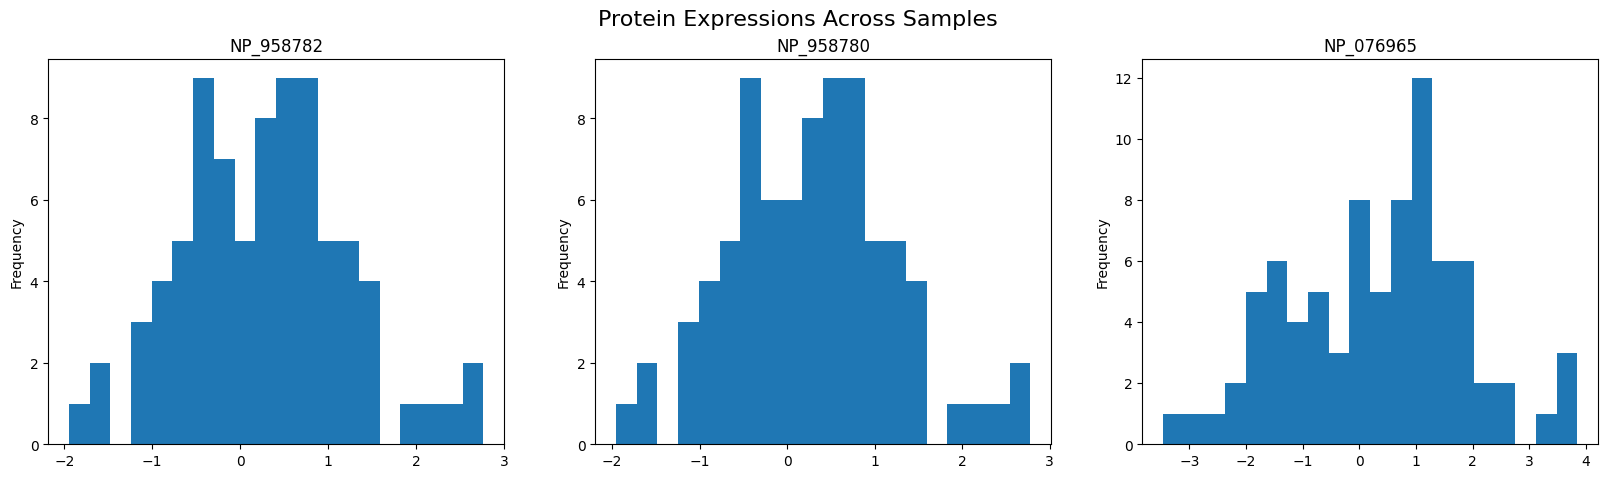

In [258]:
# We can also plot these values. Here we can see the protein expression values in one sample and their distribution
plt.figure(figsize=(20,5))
plt.suptitle("Protein Expressions Across Samples", fontsize=16)
plt.subplot(1,3,1)
data[proteins[0]].plot(kind="hist", bins = 20, title = proteins[0])
plt.subplot(1,3,2)
data[proteins[5]].plot(kind="hist", bins = 20, title = proteins[5])
plt.subplot(1,3,3)
data[proteins[10]].plot(kind="hist", bins = 20, title = proteins[10])

In [259]:
# Another important dataset is the clinical data
# These data contain information about the samples taken in the study. Complete TCGA ID conencts the two datasets. In my case through the mana datasets indexes
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis                           105 non-null    object 
 11  Metastasis-Coded                

In [260]:
clinical.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [261]:
# The last dataset contains information about the proteins
PAM50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GeneSymbol       100 non-null    object
 1   RefSeqProteinID  100 non-null    object
 2   Species          100 non-null    object
 3   Gene Name        100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


# Handeling Missing Values

Text(0.5, 0, 'Mising Values')

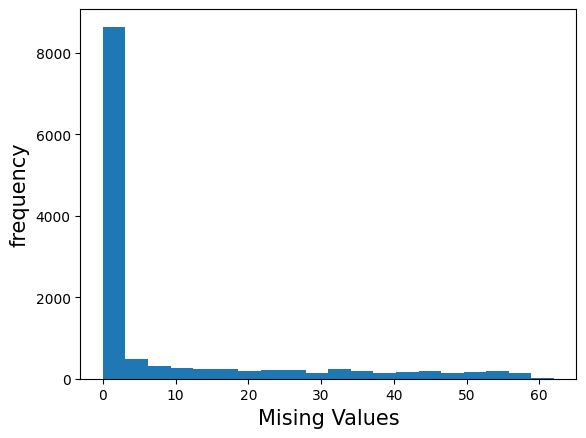

In [262]:
# Lets see the missing values. For that lets count how many there are
mising_values=data.isna().sum()
mising_values.sort_values(ascending=False).plot(kind='hist',bins=20)
plt.ylabel('frequency',fontsize=15)
plt.xlabel('Mising Values',fontsize=15)

In [263]:
# As it can be seen, most columns have only a few missing components
# As there are only 83 samples i discard any protein that has missing values more then 10%
# get features with mising values values greater than 8
mising_values[mising_values>0].shape,mising_values[mising_values>8].shape
# get list of features with missing values greater than 8
missing_value_indexes=mising_values[mising_values>8].index.tolist()
# filter columns in dataset to remove feaures with missing values greater than 8
comp_cases=[n for n in data.columns if n not in missing_value_indexes] 
fl_proteome=data[comp_cases]
# Other missing values are filled using the columnwise mean
fl_proteome=fl_proteome.fillna(fl_proteome.mean())
fl_proteome.head(n = 3)

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_653179,NP_000610,NP_699178,NP_006140,NP_068835
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,-3.071010,0.396103,1.648810,-2.813263,-7.350166,-0.332794,-2.472722,-2.580459,0.660707,4.023963
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,2.353112,3.467124,0.422827,0.389373,0.513152,-1.116049,-9.750480,1.292626,-1.554294,-0.002037
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,-1.445222,-1.284508,0.493181,2.369266,-0.100475,-0.815487,0.745731,-0.933562,2.753011,1.165554


# Scaling Data

In [264]:
# Scaling the data using sklearn
scaled_data = StandardScaler().fit_transform(fl_proteome)
scaled_data =pd.DataFrame(scaled_data)
scaled_data.columns = fl_proteome.columns
scaled_data.head()
print(scaled_data.shape)

(81, 9350)


C:\Users\jmton\AppData\Local\Temp\ipykernel_86960\2492698682.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  sc.set_xticklabels(x)


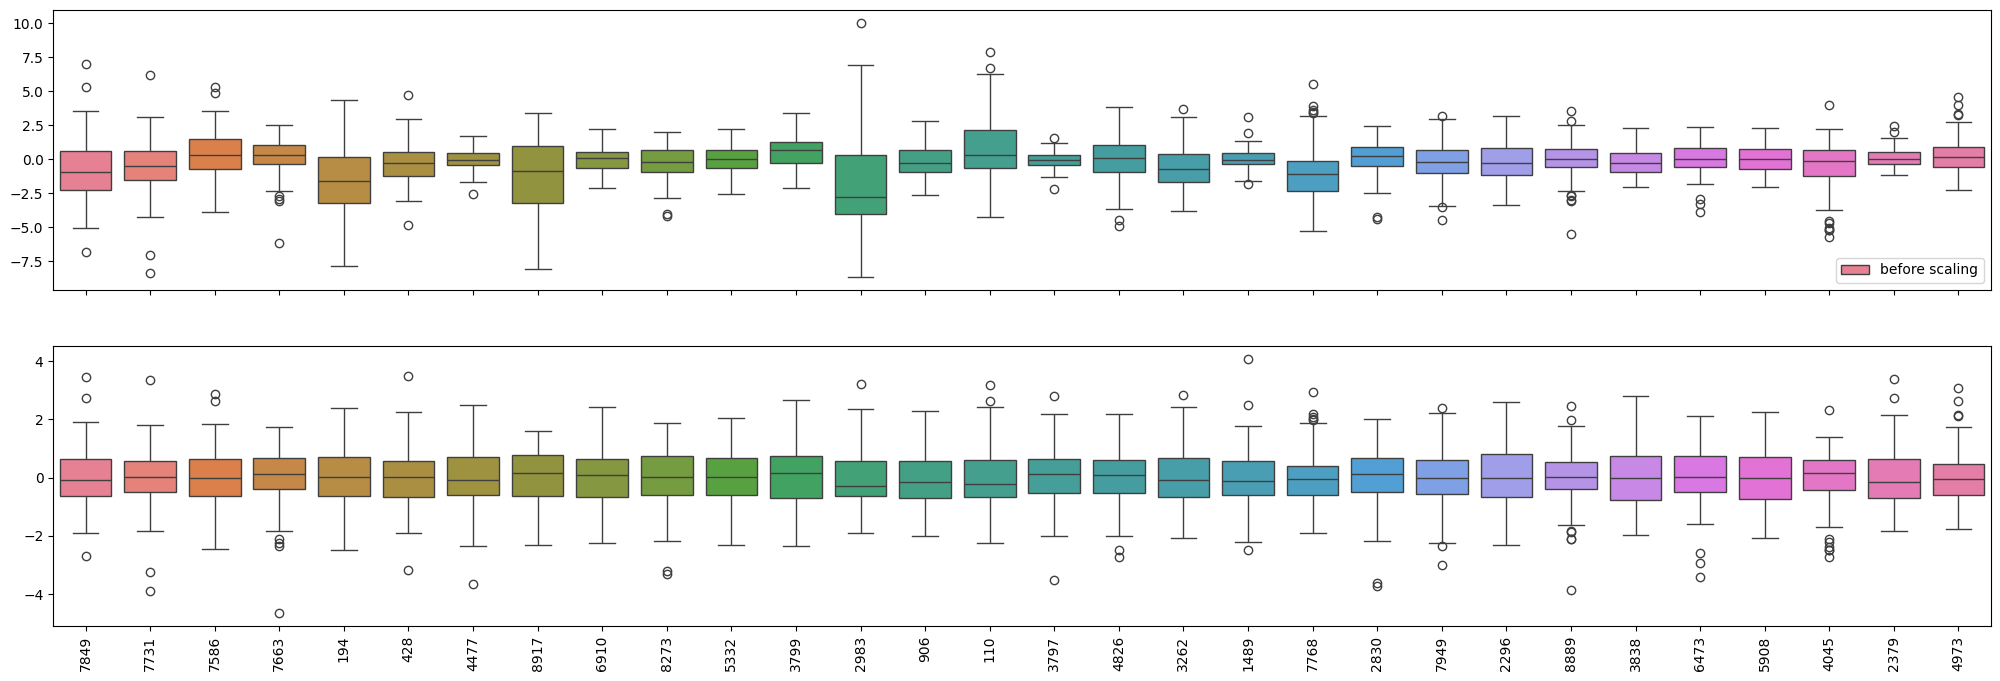

In [265]:
# Lets plot the scaled and unscaled values so we see the effects of scaling
x = [np.random.randint(0,9000) for n in range(30)]
unscaled_protein_expressions = fl_proteome.iloc[:,x]
scaled_protein_expressions = scaled_data.iloc[:,x]
fig,axs=plt.subplots(2,sharex=True,figsize=(25,8))
us = sns.boxplot(data = unscaled_protein_expressions, ax = axs[0])
us.legend(['before scaling'],loc='lower right')
sc = sns.boxplot(data = scaled_protein_expressions, ax = axs[1])
sc.set_xticklabels(x)
plt.xticks(rotation=90)
plt.show()

# Merging the main dataset with the clinical data

In [266]:
## First we re insert the sample names into the scaled data set as the first column after we changed them to be the same format as in the clinical data
def transform_id(original_id):
    # Split the ID at the dot and take the first part
    base_id = original_id.split('.')[0]
    
    # Add "TCGA-" prefix
    transformed_id = f"TCGA-{base_id}"
    
    return transformed_id

transformed_samples = []

for id in samples:
    transformed = transform_id(id)
    transformed_samples.append(transformed)

scaled_data.insert(0, "Complete TCGA ID", transformed_samples)
scaled_data.head()

,Complete TCGA ID,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_653179,NP_000610,NP_699178,NP_006140,NP_068835
0,TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,...,-1.512786,0.304049,0.788866,-1.338334,-2.324177,-0.237028,0.000000,-1.594241,0.000000,2.745424
1,TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,...,0.836233,2.054384,0.129958,0.199649,-0.173962,-1.055549,-1.998355,0.708751,-0.901580,-0.063841
2,TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,...,-0.808708,-0.653820,0.167770,1.150441,-0.341758,-0.741454,0.883735,-0.614972,0.851639,0.750882
3,TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,...,-0.097179,1.179010,-1.362946,-0.157557,-0.255203,-0.083865,2.089937,0.155590,0.060162,0.006679
4,TCGA-E2-A154,0.614302,0.614237,0.614873,0.614730,0.613635,0.614970,0.614930,0.614791,1.145202,...,1.817311,0.406947,0.244989,-0.221877,-0.143222,0.988654,-1.279025,0.777562,0.613745,-0.875896


In [267]:
# Now we collect all samples that are present in the clinical set as well
clinical_ids = clinical["Complete TCGA ID"]

# Finding common samples in the two dataset
def find_common_strings(list1, list2):
    # Convert lists to sets for efficient comparison
    set1 = set(list1)
    set2 = set(list2)
    
    # Find the intersection of the two sets
    common_strings = set1.intersection(set2)
    
    # Convert back to a list if needed
    return list(common_strings)

common_ids = find_common_strings(transformed_samples, clinical_ids)

In [268]:
# Merging the main and clinical dataset
merged_dataset = pd.merge(scaled_data, clinical, how='inner', on=['Complete TCGA ID'])
merged_dataset = merged_dataset.set_index("Complete TCGA ID")
merged_dataset.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,0.498328,...,Luminal B,-3,-12,3,2,LumA/B,3,4,3,3
TCGA-AO-A12B,-1.319372,-1.295505,-1.301229,-1.291348,-1.291797,-1.295426,-1.299650,-1.299619,-0.458977,0.567644,...,Luminal B,-3,-12,3,2,LumA/B,3,4,3,3
TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,-0.663668,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,-0.589025,...,HER2-enriched,0,-2,4,2,Her2,1,1,1,1
TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,0.182976,...,HER2-enriched,-5,-2,1,2,Basal,2,1,3,2


In [269]:
# Displaying the protein expression distribution
protein_ids = [col for col in merged_dataset if col.startswith('NP')]
len(protein_ids)

9265

In [270]:
merged_dataset[protein_ids].head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_653179,NP_000610,NP_699178,NP_006140,NP_068835
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,0.498328,...,-1.512786,0.304049,0.788866,-1.338334,-2.324177,-0.237028,0.000000,-1.594241,0.000000,2.745424
TCGA-AO-A12B,-1.319372,-1.295505,-1.301229,-1.291348,-1.291797,-1.295426,-1.299650,-1.299619,-0.458977,0.567644,...,-1.389076,0.293682,1.058677,-1.372915,-2.835582,1.117293,-0.590686,-1.522548,-1.882590,3.277111
TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,-0.663668,...,0.836233,2.054384,0.129958,0.199649,-0.173962,-1.055549,-1.998355,0.708751,-0.901580,-0.063841
TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,-0.589025,...,-0.808708,-0.653820,0.167770,1.150441,-0.341758,-0.741454,0.883735,-0.614972,0.851639,0.750882
TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,0.182976,...,-0.097179,1.179010,-1.362946,-0.157557,-0.255203,-0.083865,2.089937,0.155590,0.060162,0.006679


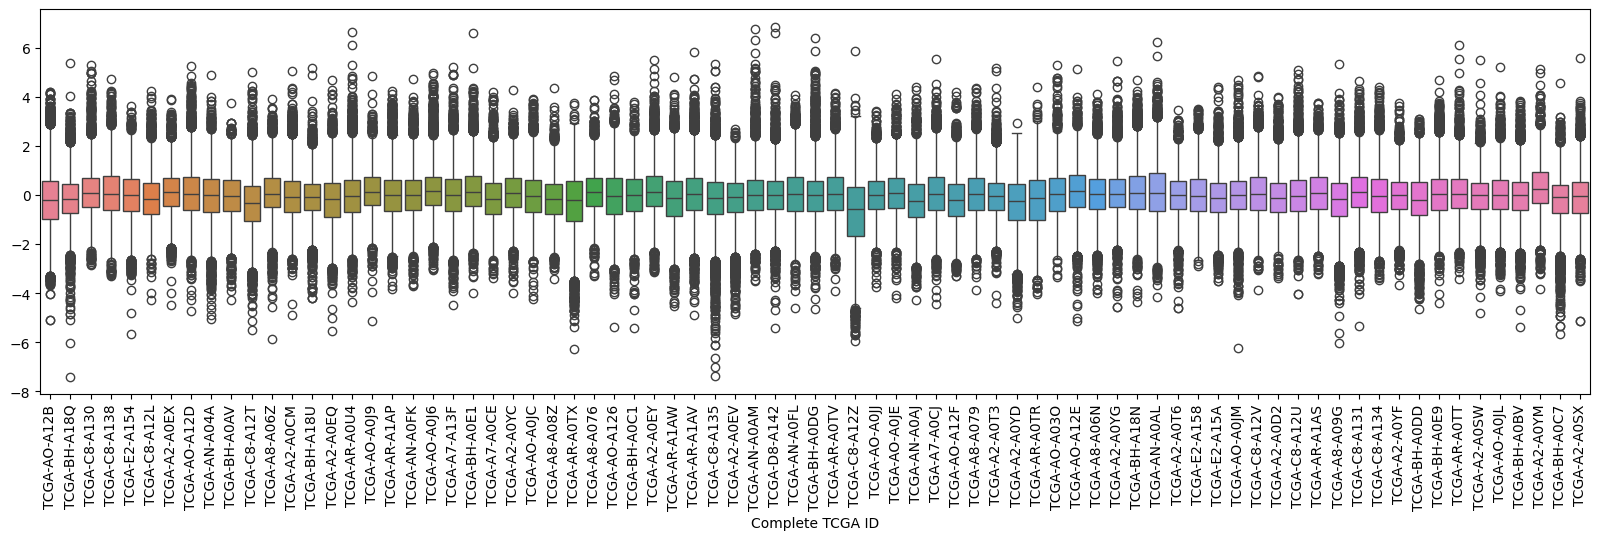

In [271]:
plt.figure(figsize=(20,5))
sns.boxplot(data = merged_dataset[protein_ids].T)
plt.xticks(rotation=90)
plt.show()

In [272]:
merged_dataset

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,0.498328,...,Luminal B,-3,-12,3,2,LumA/B,3,4,3,3
TCGA-AO-A12B,-1.319372,-1.295505,-1.301229,-1.291348,-1.291797,-1.295426,-1.299650,-1.299619,-0.458977,0.567644,...,Luminal B,-3,-12,3,2,LumA/B,3,4,3,3
TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,-0.663668,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,-0.589025,...,HER2-enriched,0,-2,4,2,Her2,1,1,1,1
TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,0.182976,...,HER2-enriched,-5,-2,1,2,Basal,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AO-A0JL,-0.411880,-0.417375,-0.416916,-0.414703,-0.417276,-0.416995,-0.416040,-0.416088,0.186978,-1.104688,...,Basal-like,0,-13,5,5,Basal,3,2,2,2
TCGA-BH-A0BV,-0.368644,-0.363741,-0.373779,-0.360976,-0.370676,-0.363343,-0.369438,-0.369489,-0.931949,0.156208,...,Luminal A,-4,0,7,4,LumA/B,5,3,1,3
TCGA-A2-A0YM,0.395365,0.390310,0.388486,0.391968,0.382601,0.390966,0.388723,0.388603,-0.821680,0.555140,...,Basal-like,-12,-13,5,5,Basal,3,2,2,2


In [273]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, TCGA-AO-A12B to TCGA-A2-A0SX
Columns: 9379 entries, NP_958782 to Integrated Clusters (unsup exp)
dtypes: float64(9351), int64(12), object(16)
memory usage: 5.6+ MB


# K-means Clustering

In [289]:
# We select from the data all proteins that are present in the PAM50 dataset as does are the genes used for breast cancer subtype prediction
PAM50_protein_ids = [col for col in merged_dataset.columns if col in PAM50['RefSeqProteinID'].values]
data_set = merged_dataset[PAM50_protein_ids]
data_set

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_060601,NP_005931,NP_003003,NP_113611,NP_004487,NP_008950,NP_114172,NP_001062,NP_057547,NP_054895
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.655970,-0.429244,-0.602777,-0.576725,-1.194303,0.106041,-0.297140,1.090405,1.104694,1.081997,...,0.370993,-0.998481,-0.709957,0.767207,1.024067,-0.633329,-1.383916,-0.042768,0.000000,-0.120916
TCGA-AO-A12B,-1.089180,-1.560799,-1.140350,-1.049536,-1.236359,-0.887308,-1.443348,1.103161,1.125840,1.181074,...,-0.451756,-1.222438,-0.460298,-1.668390,1.349230,-0.504084,-0.655635,0.043104,0.588593,0.060373
TCGA-BH-A18Q,0.085379,-0.405176,1.465091,1.497666,1.616013,-1.154427,-0.081629,-1.494123,-1.629258,-1.568098,...,-0.247296,0.164535,2.244939,-1.220990,-2.256986,-0.026769,-0.195969,0.818405,-1.104320,-0.242727
TCGA-C8-A130,0.313095,1.428953,-0.116536,0.068532,0.001862,-0.395012,-0.313932,0.858409,0.872782,0.851206,...,1.241523,0.934826,-0.166955,0.443572,0.797489,0.670581,0.523170,0.043188,-0.958516,1.370187
TCGA-C8-A138,-0.098050,0.801754,1.058769,1.196930,1.375476,0.442588,-0.408146,-0.851547,-0.744973,-0.823115,...,0.736427,0.635515,-1.052348,-0.379380,0.570648,0.131578,-0.207313,0.042983,0.158631,0.014985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AO-A0JL,1.312831,-0.248137,-1.282854,-0.487569,-0.275561,0.010736,-0.098731,-0.162539,-0.133546,-0.181762,...,0.668979,-1.094242,1.542539,0.453707,-1.788728,1.119291,0.486451,1.039743,-0.702144,2.385413
TCGA-BH-A0BV,-0.855356,-1.399183,-0.136996,0.582822,0.738251,-0.620969,-1.045241,0.148131,0.158638,0.160922,...,-0.008485,-0.384001,-0.125511,-0.593973,0.670406,-0.620388,0.352513,-0.735558,-0.019201,-0.810216
TCGA-A2-A0YM,0.228485,-0.326652,0.844714,0.548342,0.325488,-0.518405,0.637383,-0.260907,-0.251737,-0.209579,...,0.503251,0.443043,1.364635,0.000000,-1.218322,-0.528240,0.000000,0.217755,0.000000,-1.144276


### Silhouette Analysis

The silhouette score interpretation measures the quality of k-means silhouette score by evaluating how well data points group within their assigned clusters compared to data points in other clusters.

The silhouette score ranges from -1 to 1:

- 1: Ideally close data points within a cluster and far away from other clusters (good clustering).
- 0: Data points are on the border between clusters, indicating some overlap (average clustering).
- -1: Data points might be assigned to the wrong cluster (poor clustering).

### Elbow method

The total WSS (within-cluster sum of squares) measures the compactness of the clustering, and we want it to be as small as possible. The elbow method runs k-means clustering (kmeans number of clusters) on the dataset for a range of k (say 1 to 10) In the elbow method, we plot mean distance and look for the elbow point where the rate of decrease shifts. For each k, calculate the total within-cluster sum of squares (WSS). This elbow point can be used to determine K.

At first, clusters will give a lot of information (about variance), but at some point, the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the “elbow criterion”. This “elbow” can’t always be unambiguously identified.

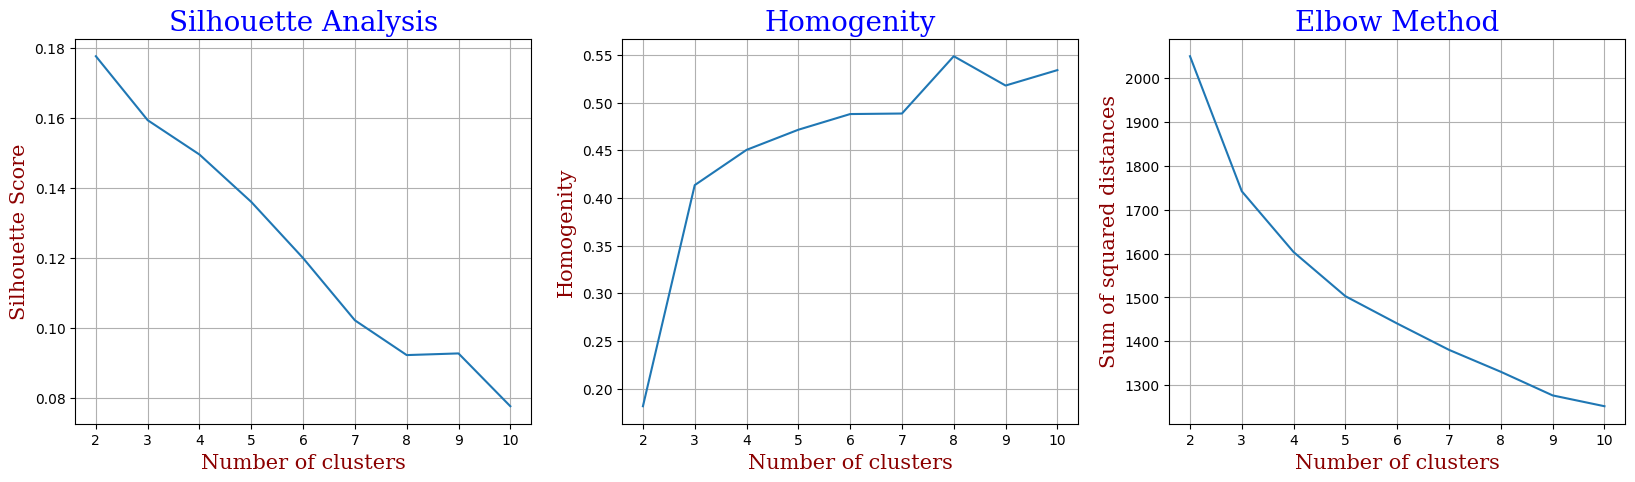

In [275]:
# Now we do the K-means clustering using the sklearn.cluster library
# We use different number of clusters to see which one is the best
n_clusters = [2,3,4,5,6,7,8,9,10]

def KMeansComparer(number_list, data):
    "Runs clustering algorithm with different number of clusters and checks their metrics"
    
    silhouette_avg = []
    homogenities = []
    Sum_of_squared_distances = []


    for n in number_list:
        temp1 = []
        temp2 = []
        temp3 = []
        # Running the clustering 10 times
        for k in range(10):
            clusterer = KMeans(n_clusters = n, max_iter = 600)
            clusterer.fit_predict(data)
            # Getting the Silhouette score of the clustering
            silhouette =  metrics.silhouette_score(data, clusterer.labels_)
            temp1.append(silhouette)
            # Getting the Homogenity Score
            homogenity = metrics.homogeneity_score(merged_dataset["PAM50 mRNA"], clusterer.labels_)
            temp2.append(homogenity)
            # Elbow method
            temp3.append(clusterer.inertia_)
        silhouette_avg.append(np.average(temp1))
        homogenities.append(np.average(temp2))
        Sum_of_squared_distances.append(np.average(temp3))

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(number_list, silhouette_avg)
    plt.xlabel("Number of clusters", fontdict=font2)
    plt.ylabel("Silhouette Score", fontdict=font2)
    plt.title("Silhouette Analysis", fontdict=font1)
    plt.grid()

    plt.subplot(1,3,2)
    plt.plot(number_list, homogenities)
    plt.xlabel("Number of clusters", fontdict=font2)
    plt.ylabel("Homogenity", fontdict=font2)
    plt.grid()
    plt.title("Homogenity", fontdict=font1)

    plt.subplot(1,3,3)
    plt.plot(number_list, Sum_of_squared_distances)
    plt.xlabel("Number of clusters", fontdict=font2)
    plt.ylabel("Sum of squared distances", fontdict=font2)
    plt.grid()
    plt.title("Elbow Method", fontdict=font1)

KMeansComparer(n_clusters, data_set)

### K-means Comparison Conclusion

We used the k-means clustering on the protein values across samples with different number of target clusters. As it turn out the number of optimal clusters is between 3-4, which we get by looking at the above plots, which depict the results of the Silhouette Analysis and Elbow Method. This is in line with the original study, where they concluded that the optimal number of clusters are 3.

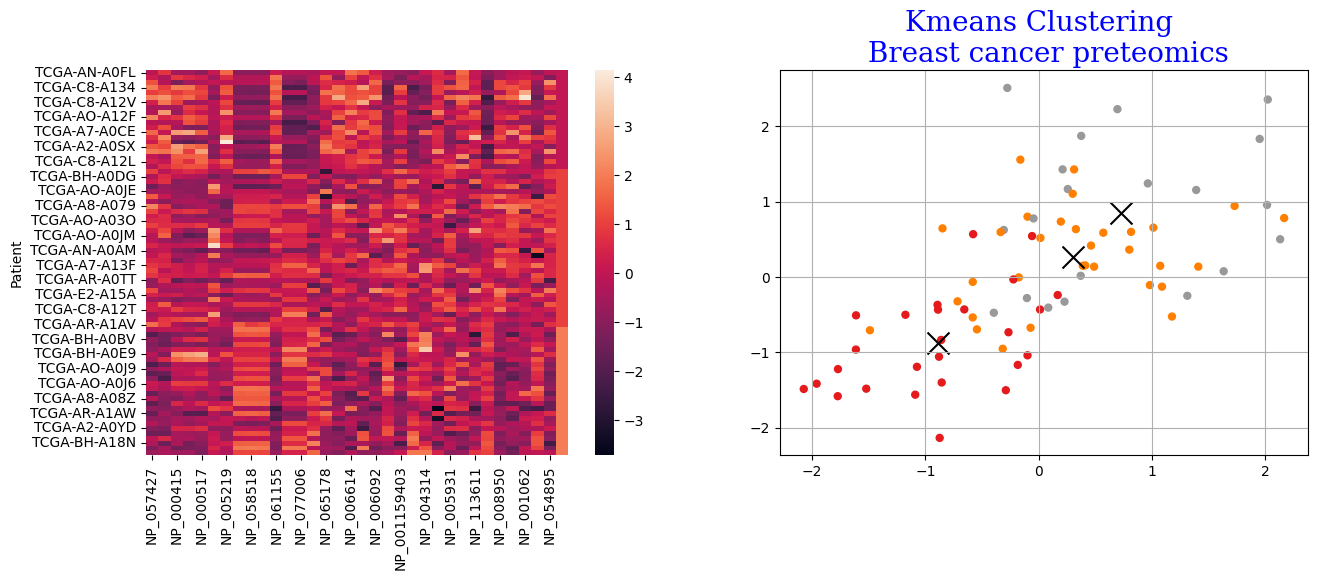

In [276]:
# Ploting the best clustering
# Number of clusters = 3


cluster3 = KMeans(n_clusters = 3)
cluster3 = cluster3.fit(data_set)
## Putting this into a new dataset
Protein_data_cluster3 = pd.DataFrame(data_set)
Protein_data_cluster3['KMeans_cluster'] = cluster3.labels_
Protein_data_cluster3.sort_values('KMeans_cluster',axis=0,inplace=True)
Protein_data_cluster3.index.name = 'Patient'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sb.heatmap(Protein_data_cluster3)

plt.subplot(1,2,2)
plt.scatter(data_set["NP_057427"], data_set["NP_002408"], c=cluster3.labels_, cmap="Set1_r", s=25)
plt.scatter(cluster3.cluster_centers_[:,0] ,cluster3.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Breast cancer preteomics", fontdict=font1)
plt.grid()

# Advanced Cluster Analysis

- Explore other clustering algorithms (e.g., hierarchical, DBSCAN) to understand if they provide different or more detailed subtyping.
- Investigate how protein expression patterns within these clusters relate to clinical characteristics.

## Hierarchical Clustering

<Figure size 1000x300 with 0 Axes>

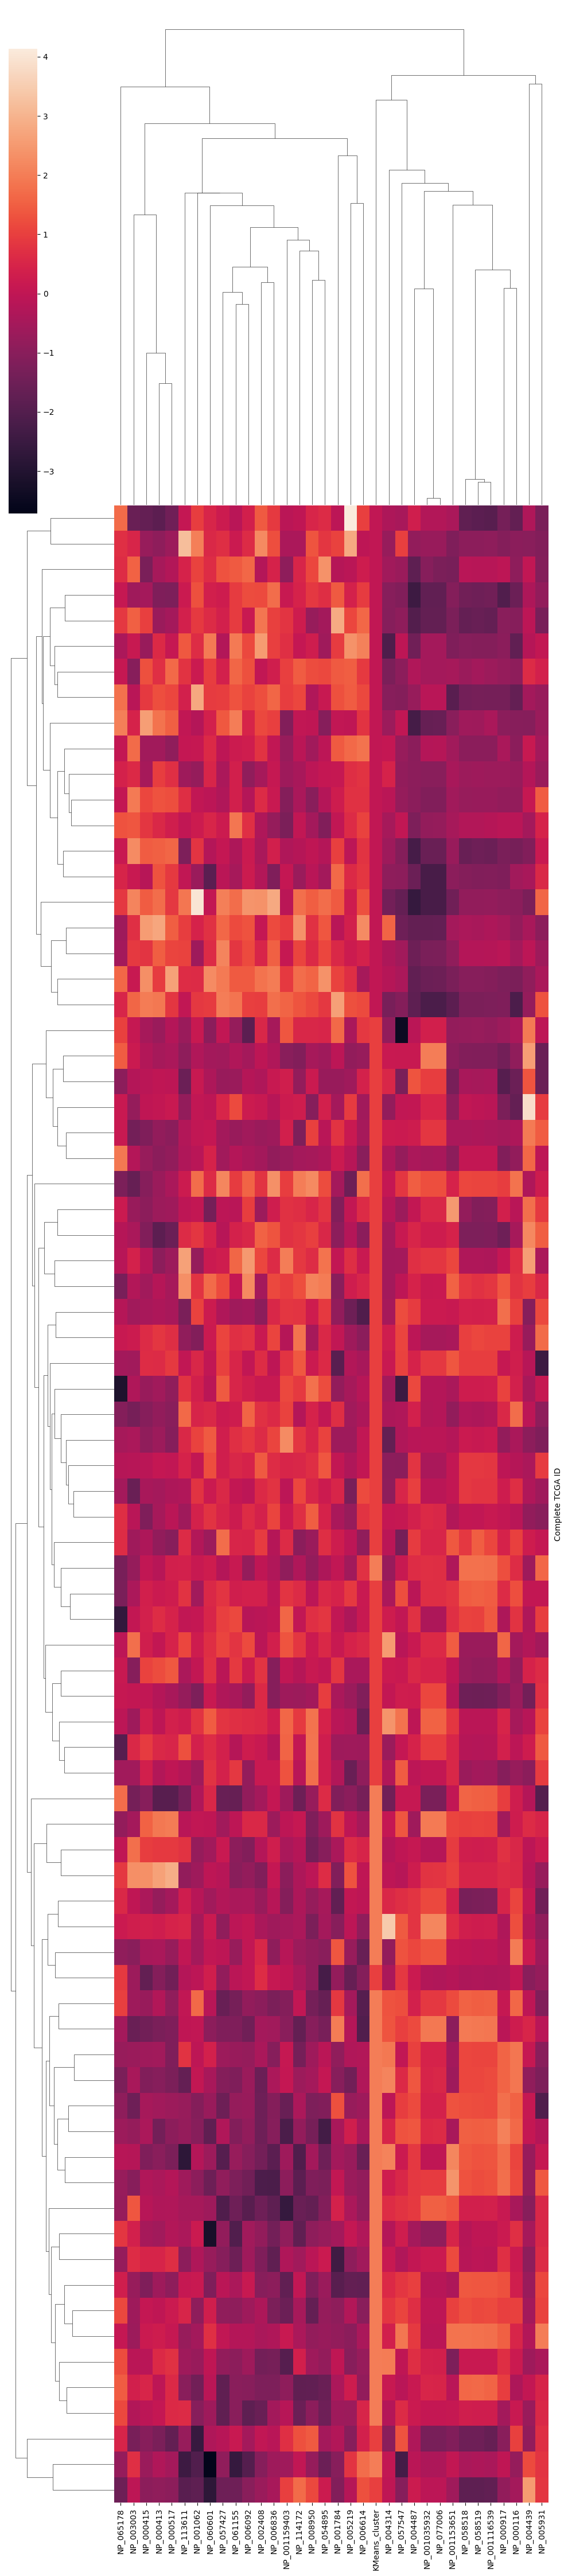

In [277]:
plt.figure(figsize=(10, 3))
sns.clustermap(data_set,  row_cluster=True, col_cluster=True, figsize=(10, 45), yticklabels=False)

We get the highest silhouette score at 3


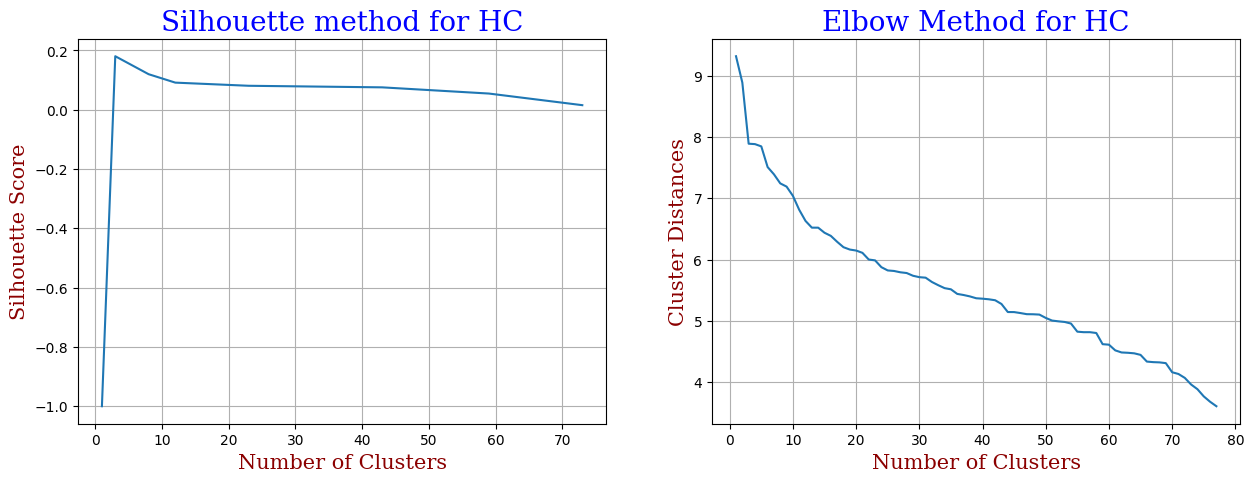

In [278]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
# Perform hierarchical clustering
linked = linkage(data_set, method='average')

# Define a distance threshold to cut the dendrogram into clusters and irratitng over "t" to find the best
scores = []
number_of_clusters = []

for t in np.linspace(4, 10, 10):
    clusters = fcluster(linked, t=t, criterion='distance')
    if len(set(clusters)) > 1:  # Silhouette score needs at least 2 clusters
        score = metrics.silhouette_score(data_set, clusters)
        scores.append(score)
        number_of_clusters.append(len(set(clusters)))
    else:
        scores.append(-1)  # Invalid score for single cluster
        number_of_clusters.append(len(set(clusters)))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(number_of_clusters, scores)
plt.xlabel("Number of Clusters", fontdict=font2)
plt.ylabel("Silhouette Score", fontdict=font2)
plt.title("Silhouette method for HC", fontdict=font1)
plt.grid()

plt.subplot(1,2,2)
heights = linked[:, 2]
plt.plot(range(1, len(heights) + 1), heights[::-1])
plt.xlabel("Number of Clusters", fontdict=font2)
plt.ylabel("Cluster Distances", fontdict=font2)
plt.title("Elbow Method for HC", fontdict=font1)
plt.grid()

print(f"We get the highest silhouette score at {number_of_clusters[scores.index(max(scores))]}")

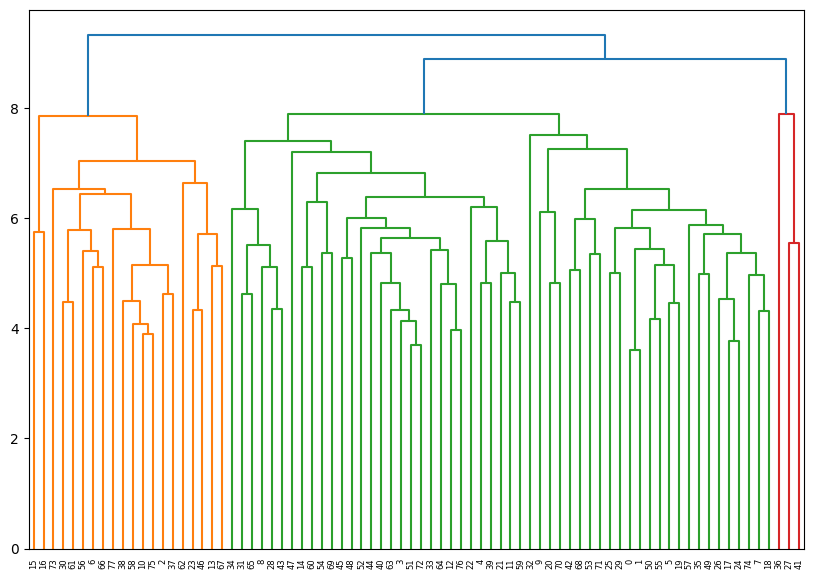

In [279]:
plt.figure(figsize=(10, 7))
data_set_t = data_set.T
dendrogram(linked, color_threshold=np.linspace(4, 10, 10)[scores.index(max(scores))])
plt.show()

As we can see hierarchical clustering gives the same result as the k-means clustering

We get the highest silhouette score at 9


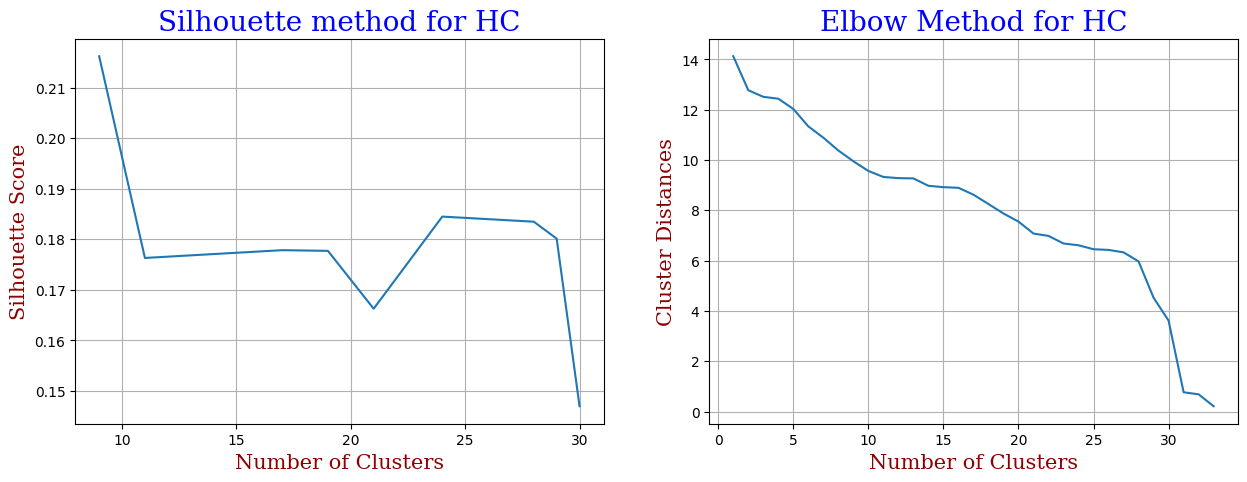

In [280]:
data_set1 = data_set.T

linked1 = linkage(data_set1, method='average')

# Define a distance threshold to cut the dendrogram into clusters and irratitng over "t" to find the best
scores = []
number_of_clusters = []

for t in np.linspace(4, 10, 10):
    clusters = fcluster(linked1, t=t, criterion='distance')
    if len(set(clusters)) > 1:  # Silhouette score needs at least 2 clusters
        score = metrics.silhouette_score(data_set1, clusters)
        scores.append(score)
        number_of_clusters.append(len(set(clusters)))
    else:
        scores.append(-1)  # Invalid score for single cluster
        number_of_clusters.append(len(set(clusters)))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(number_of_clusters, scores)
plt.xlabel("Number of Clusters", fontdict=font2)
plt.ylabel("Silhouette Score", fontdict=font2)
plt.title("Silhouette method for HC", fontdict=font1)
plt.grid()

plt.subplot(1,2,2)
heights = linked1[:, 2]
plt.plot(range(1, len(heights) + 1), heights[::-1])
plt.xlabel("Number of Clusters", fontdict=font2)
plt.ylabel("Cluster Distances", fontdict=font2)
plt.title("Elbow Method for HC", fontdict=font1)
plt.grid()

print(f"We get the highest silhouette score at {number_of_clusters[scores.index(max(scores))]}")

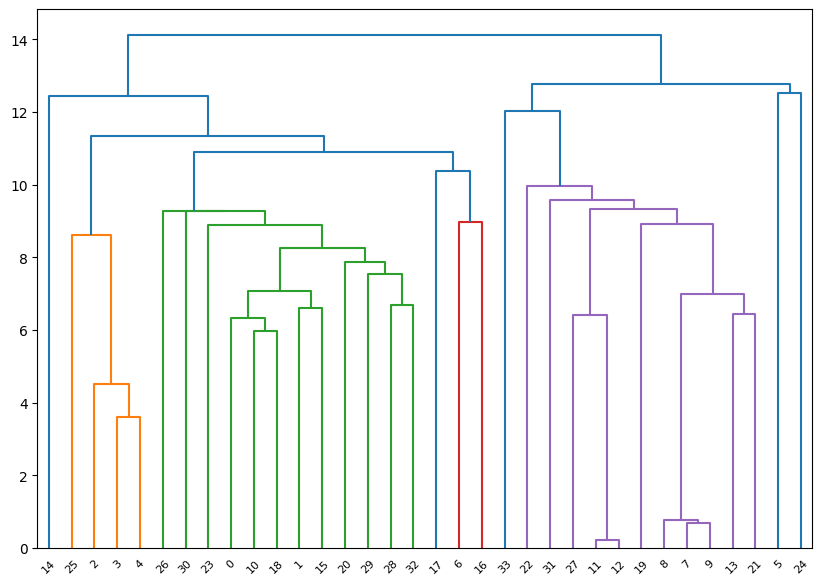

In [288]:
plt.figure(figsize=(10, 7))
data_set_t = data_set.T
dendrogram(linked1, color_threshold=np.linspace(4, 10, 10)[scores.index(max(scores))])
plt.show()

# PCA

The point of performing PCA is to reduce the number of dimensions within our data

To get 95% of the variance we need 19 principal components


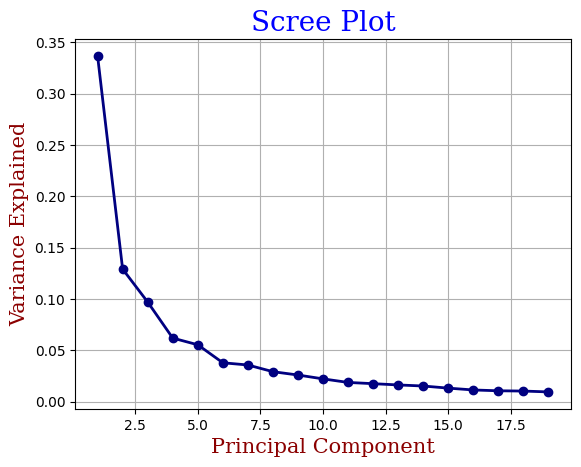

In [282]:
from sklearn.decomposition import PCA

data_set.pop('KMeans_cluster')

#Typically, we want the explained variance to be between 95–99%. In Scikit-learn we can set it
pca = PCA(n_components=0.95)

#fit PCA model to data
pca_fit = pca.fit_transform(data_set)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='navy')
plt.title('Scree Plot', fontdict=font1)
plt.xlabel('Principal Component', fontdict=font2)
plt.ylabel('Variance Explained', fontdict=font2)
plt.grid()

print(f"To get 95% of the variance we need {len(pca.explained_variance_ratio_)} principal components")

In [283]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.33671561 0.12910922 0.09700833 0.06188996 0.05535666 0.03783344
 0.03567375 0.02915405 0.02589957 0.0221549  0.01867976 0.01747529
 0.01624183 0.01519867 0.0131283  0.01135396 0.01054307 0.01029244
 0.00944005]


In [284]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative variance explained by each component:", cumulative_variance)

Cumulative variance explained by each component: [0.33671561 0.46582483 0.56283316 0.62472312 0.68007978 0.71791322
 0.75358697 0.78274102 0.80864059 0.83079549 0.84947525 0.86695054
 0.88319237 0.89839104 0.91151935 0.9228733  0.93341638 0.94370881
 0.95314887]


In [285]:
loadings = pd.DataFrame(pca.components_, columns=data_set.columns, index=[f"PC{i+1}" for i in range(len(pca.components_))])
print(loadings)

      NP_057427  NP_002408  NP_000415  NP_000413  NP_000517  NP_004439  \
PC1    0.214669   0.228025   0.128075   0.121581   0.108767  -0.012855   
PC2    0.238887   0.107340  -0.032438  -0.037786  -0.032638  -0.028832   
PC3    0.087219  -0.101877   0.418990   0.441362   0.429663  -0.262775   
PC4    0.025782  -0.155330   0.162705   0.190246   0.210657   0.315298   
PC5   -0.062701   0.156698   0.140461   0.088301   0.173730   0.186019   
PC6    0.021581   0.054027  -0.033942  -0.012064  -0.032323   0.367260   
PC7   -0.038001   0.142061   0.070395   0.043649   0.053670   0.148306   
PC8   -0.054128   0.057271  -0.094625  -0.115314  -0.128929  -0.232562   
PC9    0.030921  -0.060705  -0.032984  -0.088090   0.008432   0.399695   
PC10  -0.040775  -0.047180  -0.085834  -0.016528  -0.047882  -0.115175   
PC11   0.204860  -0.033528  -0.081453  -0.012868  -0.088641   0.221622   
PC12   0.019718  -0.147464   0.037671  -0.062411  -0.099459   0.197694   
PC13  -0.064196  -0.070081  -0.186675 

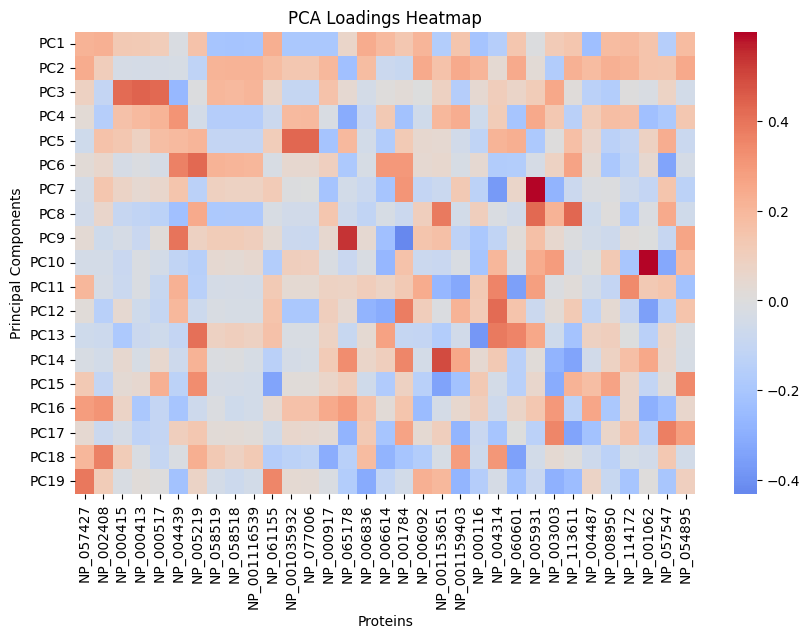

In [286]:
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=False, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.xlabel("Proteins")
plt.ylabel("Principal Components")
plt.show()

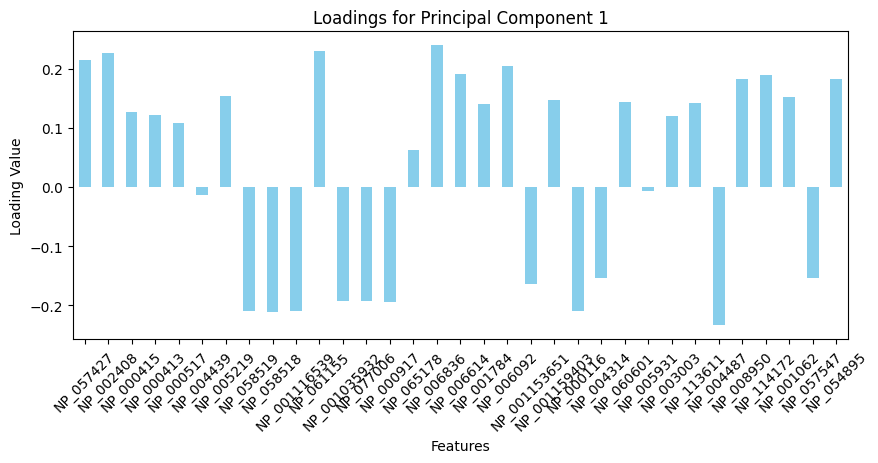

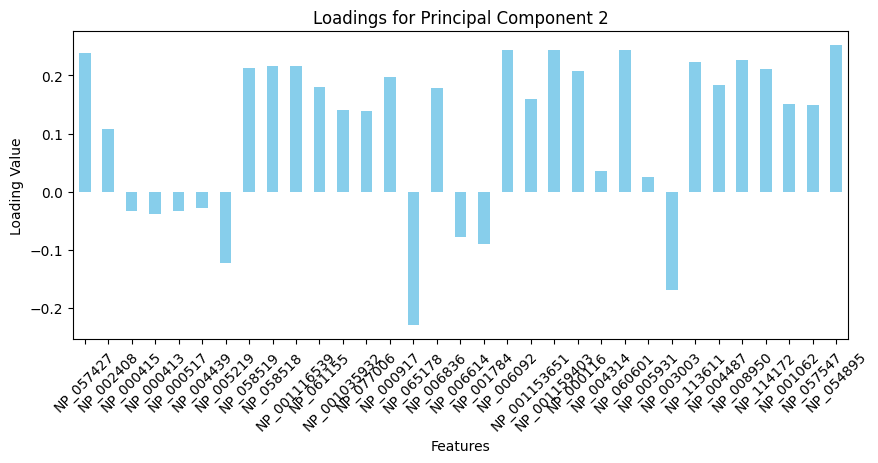

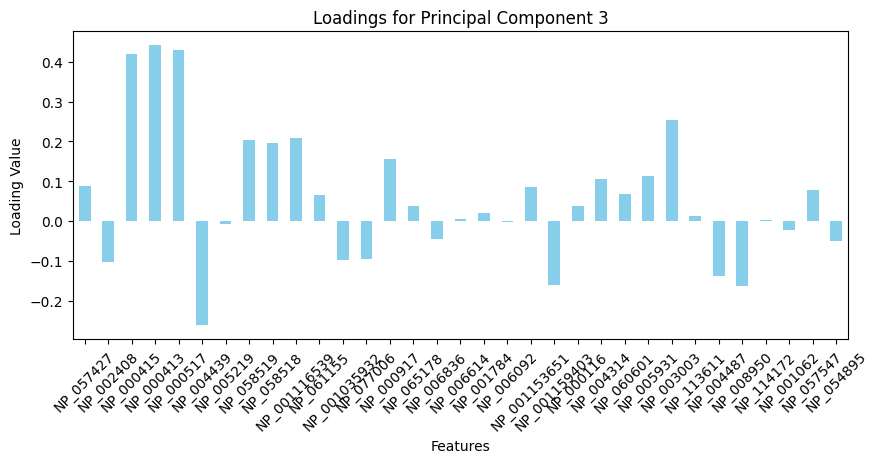

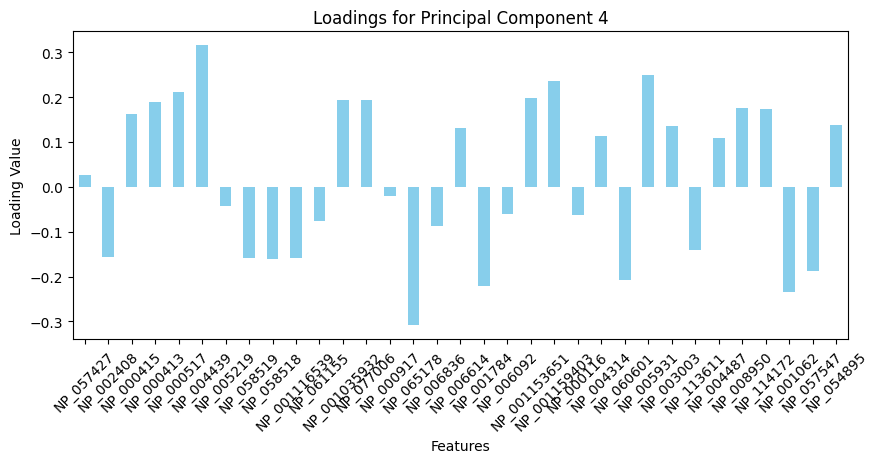

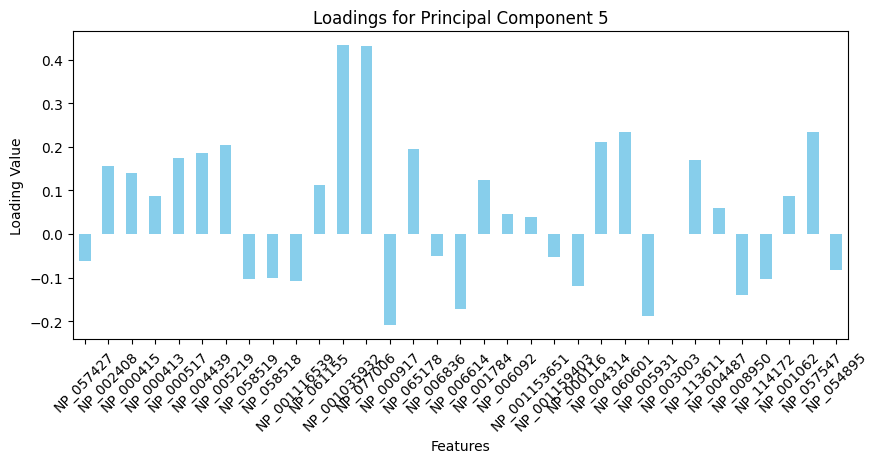

In [287]:
for i in range(5):
    plt.figure(figsize=(10, 4))
    pc_loadings = loadings.iloc[i]
    pc_loadings.plot(kind="bar", color="skyblue")
    plt.title(f"Loadings for Principal Component {i + 1}")
    plt.xlabel("Features")
    plt.ylabel("Loading Value")
    plt.xticks(rotation=45)
    plt.show()

In [290]:
column_sums = loadings.sum()

# Sort the columns by the sum values in descending order
sorted_columns = column_sums.sort_values(ascending=False)

print("Columns sorted by their sums:")
print(sorted_columns)

Columns sorted by their sums:
NP_005931       1.994231
NP_005219       1.771404
NP_057427       1.604810
NP_054895       1.270330
NP_001784       1.241449
NP_004314       1.090168
NP_002408       0.695122
NP_001153651    0.684969
NP_000415       0.610496
NP_061155       0.568589
NP_004439       0.534138
NP_000517       0.465949
NP_003003       0.458845
NP_006092       0.439604
NP_001035932    0.403617
NP_077006       0.402359
NP_114172       0.394638
NP_000917       0.382365
NP_058519       0.288357
NP_001116539    0.176939
NP_008950       0.171713
NP_058518       0.169957
NP_000413       0.160499
NP_113611       0.083955
NP_065178       0.079940
NP_006836       0.043945
NP_001159403   -0.026219
NP_057547      -0.032541
NP_004487      -0.034197
NP_001062      -0.050159
NP_060601      -0.322002
NP_000116      -0.723247
NP_006614      -0.968955
dtype: float64
